**Week 3 – Classification**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [0]:
# #@title
# # To support both python 2 and python 3
# from __future__ import division, print_function, unicode_literals

# # Common imports
# import numpy as np
# import os

# # to make this notebook's output stable across runs
# np.random.seed(42)

# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "classification"

# def save_fig(fig_id, tight_layout=True):
#     path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format='png', dpi=300)

# MNIST

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Learn more about the dataset [here](http://yann.lecun.com/exdb/mnist/).


Learn more about [OpenML](https://www.openml.org/).


In [0]:
from sklearn.datasets import fetch_openml
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

# What type of data object is MNIST?

In [0]:
# How do you know? What funtion/method would tell us the type of an object? Try describe, show, try, learn, type and see which one works!
type(mnist)

sklearn.utils.Bunch

## What is MNIST data shape/dimension?

In [0]:
#mnist.data is a numpy array
print(type(mnist.data))

#use shape to see shape of a numpy array
mnist.data.shape

<class 'numpy.ndarray'>


(70000, 784)

In [0]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

## Lets take a look at example of handwritings!

In [0]:
# Define a function to plot image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,#mlp (matplotlib)
               interpolation="nearest")
    plt.axis("off")

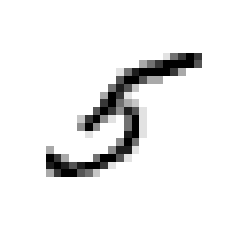

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[35] # Index can be between 0 to 69999!
plot_digit(some_digit)

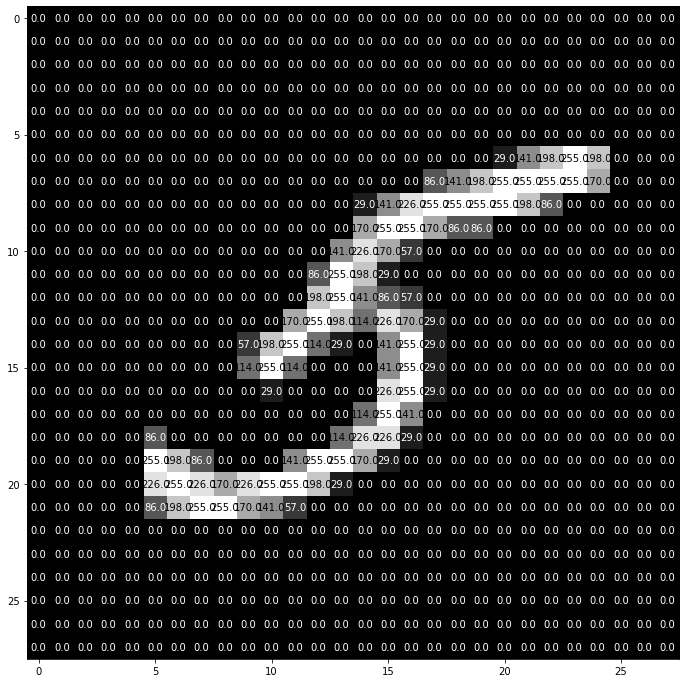

In [0]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X[35].reshape(28,28), ax)

# Lets see content of target variable

In [0]:
y[35]

5

# Split dataset to train and test

In [0]:
# Write a code to split your dataset into 80/20 dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

### Verify data dimension

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56000, 784), (14000, 784), (56000,), (14000,))

# Binary classifier

###Predict if an image is 5 or not.

In [0]:
# if y_train value equals 5, it replaces it with true otherwise false
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_5)
y_train_5 = le.transform(y_train_5)
y_test_5 = le.transform(y_test_5)

**Note**: a few hyperparameters will have a different default value in future versions of Scikit-Learn, so a warning is issued if you do not set them explicitly. This is why we set `max_iter=5` and `tol=-np.infty`, to get the same results as in the book, while avoiding the warnings.

In [0]:
from sklearn.linear_model import SGDClassifier

#sgd stands for stochastic gradient descent (read more about GSD https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd)
#clf stands for classifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

### We just built a model. Now lets pass a single image to it and see the response

In [0]:
# See the value of 11th image and corresponding label
print(y_train_5[35])
print(X[35])

0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  29. 141. 198. 255. 198.   0.   0.   0.
   0

# How does  above array representing X[11] which is image of 5?

In [0]:
# Predict using the model
pred = sgd_clf.predict([X[35]])
pred[0]

1

# Use Cross Validation Technique

In [0]:
from sklearn.model_selection import cross_val_score

# Fit the model with CS=3
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.94380457, 0.93485831, 0.96780242])

In [0]:
#Above cell mimics below logic. As you see the results are the same. This cell is just for your self-study. Using previous cell is good enough in practice
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.943804574918305
0.9348583061016768
0.9678024215150541


In [0]:
#BaseEstimator is when there is no model!
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [0]:

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91032303, 0.91085873, 0.90817529])

## As you see accuracy of base model is 90%! 

Can you explain it?

In [0]:
# Look at number of times 5 is repeated in the dataset!
import numpy as np

np.unique(y_train_5, return_counts=True)

# As expected, 5 is repeated only 10% of the times. So, even if we never detect it, stil we will have 90% accuracy!


(array([0, 1]), array([50948,  5052]))

In [0]:
np.unique(never_5_clf.predict(X_train), return_counts = True)

(array([False]), array([56000]))

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#### Assignment 3 :Train 3 different models (choose which 3 models you want to pick). Test them both on binary classification (5 and not 5) and also multi-class classification (1 to 10).

In [0]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import accuracy_score

#### 1. KNN Classifier

In [0]:
knn_clf = KNeighborsClassifier(leaf_size=30, n_neighbors=50)
knn_clf.fit(X_train, y_train_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [0]:
y_pred_knn_tr = knn_clf.predict(X_train)
accuracy_score(y_train_5, y_pred_knn_tr)

0.9906964285714286

In [0]:
#predict the test set
y_pred_knn_te = knn_clf.predict(X_test)
accuracy_score(y_test_5, y_pred_knn_te)

0.9915714285714285

#### 2. Random Forest Classifier

In [0]:
rnf_clf = RandomForestClassifier(n_estimators=1000,random_state = 42)
rnf_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rnf_tr = rnf_clf.predict(X_train)
accuracy_score(y_train_5, y_pred_rnf_tr)

1.0

In [0]:
#predict the test set
y_pred_rnf_te = rnf_clf.predict(X_test)
accuracy_score(y_test_5, y_pred_rnf_te)

0.9893571428571428

#### 3. Logistic Regression

In [0]:
import warnings
warnings.filterwarnings("ignore")
Log_Classifier = LogisticRegression(C= 100, random_state = 42)
Log_Classifier.fit(X_train, y_train_5)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log_tr = Log_Classifier.predict(X_train)
accuracy_score(y_train_5, y_pred_log_tr)

0.97775

In [0]:
#predict the test set
y_pred_log_te = Log_Classifier.predict(X_test)
accuracy_score(y_test_5, y_pred_log_te)

0.9762857142857143

Using Cross Validation (Similar to SGD Classifier)

In [0]:
# KNN
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    knn_clf.fit(X_train_folds, y_train_folds)
    y_pred_knn = knn_clf.predict(X_test_fold)
    n_correct = sum(y_pred_knn == y_test_fold)
    print(n_correct / len(y_pred_knn))

0.9895001874966518
0.9879466438099319
0.989713918354227


Cross Val Prediction for Precision and Recall

In [0]:
y_pred_knn_tr = cross_val_predict(knn_clf, X_train, y_train_5, cv=3)

In [0]:
# Random Forest
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    rnf_clf.fit(X_train_folds, y_train_folds)
    y_pred_rnf = rnf_clf.predict(X_test_fold)
    n_correct = sum(y_pred_rnf == y_test_fold)
    print(n_correct / len(y_pred_rnf))

0.9884287780575347
0.9861788182353887
0.98816029143898


In [0]:
# Cross Val Prediction for Precision and Recall
y_pred_rnf_tr = cross_val_predict(rnf_clf, X_train, y_train_5, cv=3)

In [0]:
# Logistic Regression
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    Log_Classifier.fit(X_train_folds, y_train_folds)
    y_pred_log = Log_Classifier.predict(X_test_fold)
    n_correct = sum(y_pred_log == y_test_fold)
    print(n_correct / len(y_pred_log))

0.9755182943161729
0.9718755022231745
0.9741240758598522


In [0]:
# Cross Val Prediction for Precision and Recall
y_pred_log_tr = cross_val_predict(Log_Classifier, X_train, y_train_5, cv=3)

#A thought for your brain:

#### Look at below evaluation results (confusion matrix, Precision and Recall values) and record them in your book. Then change the value of cv in above cell. Either increase or decrese cv and calculate precision and recall again. What do you observe?

#### Can you explain it?

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Rows are model predictions (0,1)
# Cols are actual y (0,1)

array([[48977,  1971],
       [  895,  4157]])

In [0]:
y_train_perfect_predictions = y_train_5

# Too good to believe model!!!

In [0]:
confusion_matrix(y_train_perfect_predictions,y_train_5)

array([[50948,     0],
       [    0,  5052]])

# Precision of all 4 models!

In [0]:
#SGD Classifier
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.6783616187989556

In [0]:
#KNN
precision_score(y_train_5, y_pred_knn_tr)

0.9715317612067134

In [0]:
#Random Forest
precision_score(y_train_5, y_pred_rnf_tr)

0.9918717543463536

In [0]:
#Logistic Regression
precision_score(y_train_5, y_pred_log_tr)

0.890145747226452

#  Recall of our 4 model

In [0]:
#SGD
recall_score(y_train_5, y_train_pred)

0.8228424386381631

In [0]:
#KNN
recall_score(y_train_5, y_pred_knn_tr)

0.9051860649247823

In [0]:
#Random Forest
recall_score(y_train_5, y_pred_rnf_tr)

0.869556611243072

In [0]:
#Logistic Regression
recall_score(y_train_5, y_pred_log_tr)

0.8099762470308789

# F1 score of 4 models

In [0]:
#SGD
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# As you see, F1 score penalizes 91% compared to 59% recall

0.7436493738819321

In [0]:
#KNN
f1_score(y_train_5, y_pred_knn_tr)

0.9371861871093349

In [0]:
#Random Forest
f1_score(y_train_5, y_pred_rnf_tr)

0.9266954962556693

In [0]:
#Logistic Regression
f1_score(y_train_5, y_pred_log_tr)

0.848170794901026

#What is best Precision Recall Ratio?

In [0]:
# 
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([28784.81023749])

In [0]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [0]:
y_some_digit_pred

array([ True])

In [0]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Note: there was an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) in Scikit-Learn 0.19.0 (fixed in 0.19.1) where the result of `cross_val_predict()` was incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array had an extra first dimension full of 0s. Just in case you are using 0.19.0, we need to add this small hack to work around this issue:

Decision Function for SGD

In [0]:
y_scores_1 = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [0]:
y_scores_ = sgd_clf.decision_function(X_train)
y_scores_

array([-354608.65379616, -366237.37845356, -183007.50930812, ...,
       -384037.65532286,  -91721.20579813, -716725.24495839])

In [0]:
if y_scores_1.ndim == 2:
    y_scores_1 = y_scores_1[:, 1]

Decision Function for KNN

In [0]:
y_scores_2 = cross_val_predict(knn_clf, X_train, y_train_5, cv=3,
                             method="predict_proba")
if y_scores_2.ndim == 2:
    y_scores_2 = y_scores_2[:, 1]

In [0]:
y_scores_ = knn_clf.predict_proba(X_train)
y_scores_

array([[0.92, 0.08],
       [1.  , 0.  ],
       [0.82, 0.18],
       ...,
       [1.  , 0.  ],
       [0.7 , 0.3 ],
       [1.  , 0.  ]])

Decision Function for Random Forest

In [0]:
y_scores_3 = cross_val_predict(rnf_clf, X_train, y_train_5, cv=3,
                             method="predict_proba")
if y_scores_3.ndim == 2:
    y_scores_3 = y_scores_3[:, 1]

In [0]:
y_scores_ = rnf_clf.predict_proba(X_train)
y_scores_

array([[0.993, 0.007],
       [0.997, 0.003],
       [0.98 , 0.02 ],
       ...,
       [0.985, 0.015],
       [0.953, 0.047],
       [1.   , 0.   ]])

Decision Function for Logistic Regression

In [0]:
y_scores_4 = cross_val_predict(Log_Classifier, X_train, y_train_5, cv=3,
                             method="predict_proba")
if y_scores_4.ndim == 2:
    y_scores_4 = y_scores_4[:, 1]

In [0]:
y_scores_ = Log_Classifier.predict_proba(X_train)
y_scores_

array([[9.99882916e-01, 1.17083999e-04],
       [9.94147162e-01, 5.85283754e-03],
       [6.61933604e-01, 3.38066396e-01],
       ...,
       [9.98696548e-01, 1.30345184e-03],
       [9.84944799e-01, 1.50552010e-02],
       [9.99999204e-01, 7.95674497e-07]])

# Plot Precision/Recall Curve

In [0]:
from sklearn.metrics import precision_recall_curve

precisions_1, recalls_1, thresholds_1 = precision_recall_curve(y_train_5, y_scores_1)
precisions_2, recalls_2, thresholds_2 = precision_recall_curve(y_train_5, y_scores_2)
precisions_3, recalls_3, thresholds_3 = precision_recall_curve(y_train_5, y_scores_3)
precisions_4, recalls_4, thresholds_4 = precision_recall_curve(y_train_5, y_scores_4)

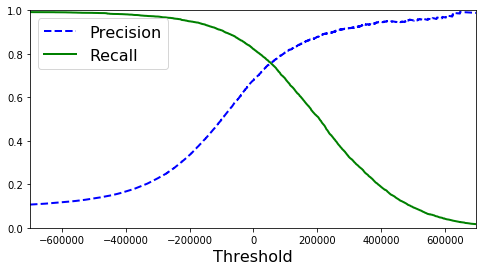

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_1, recalls_1, thresholds_1)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [0]:
y_train_pred_90_1 = (y_scores_1 > 70000)


In [0]:
print(precision_score(y_train_5, y_train_pred_90_1))

0.7747710241465445


In [0]:
recall_score(y_train_5, y_train_pred_90_1)

0.7367379255740301

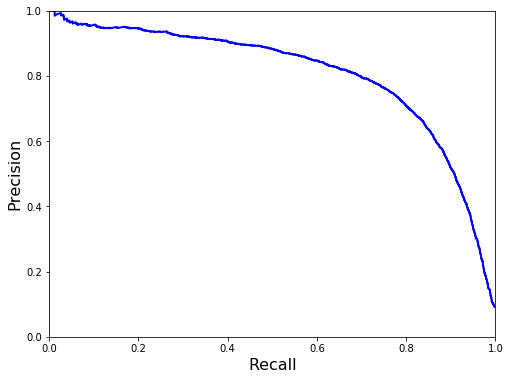

In [0]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_1, recalls_1)
plt.show()

KNN

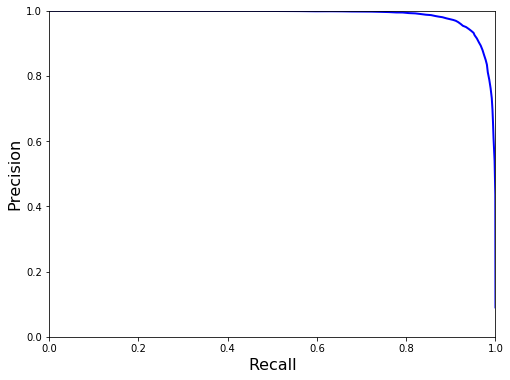

In [0]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_2, recalls_2)
plt.show()

Random Forest

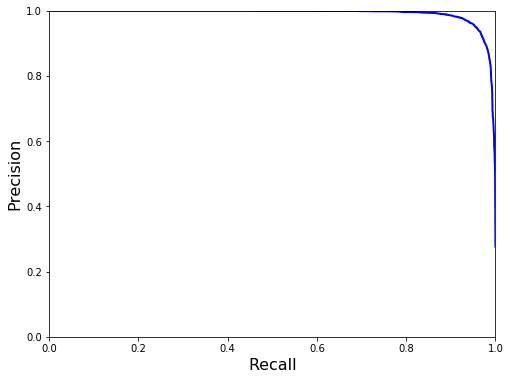

In [0]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_3, recalls_3)
plt.show()

Logistic Regression

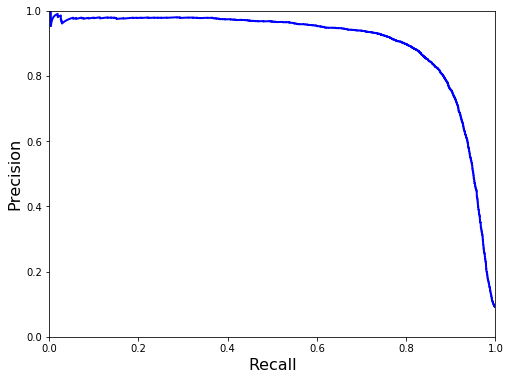

In [0]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_4, recalls_4)
plt.show()

# ROC curves

In [0]:
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y_train_5, y_scores_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_train_5, y_scores_2)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_train_5, y_scores_3)
fpr_4, tpr_4, thresholds_4 = roc_curve(y_train_5, y_scores_4)

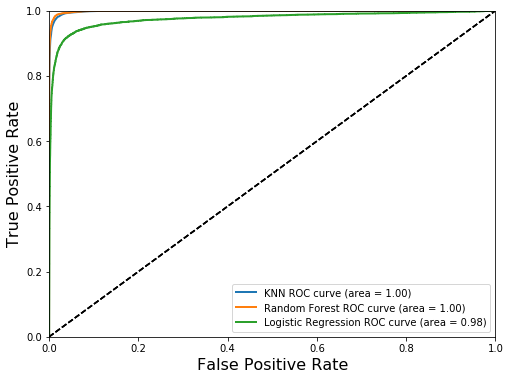

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
#plot_roc_curve(fpr_1, tpr_1,label='SGD ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_train_5, y_scores_1)))
plot_roc_curve(fpr_2, tpr_2,label='KNN ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_train_5, y_scores_2)))
plot_roc_curve(fpr_3, tpr_3,label='Random Forest ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_train_5, y_scores_3)))
plot_roc_curve(fpr_4, tpr_4,label='Logistic Regression ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_train_5, y_scores_4)))
plt.legend(loc="lower right", fontsize=10)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_5, y_scores_1)) #SGD
print(roc_auc_score(y_train_5, y_scores_2)) # KNN
print(roc_auc_score(y_train_5, y_scores_3)) # Random Forest
print(roc_auc_score(y_train_5, y_scores_4)) # Logistic Regression

0.9599692949158228
0.9981925219609754
0.9988029746971296
0.9750200218116297


This completes the analysis for the three classification models: KNN, Random Forest and Logistic Regression 

**Note**: we set `n_estimators=10` to avoid a warning about the fact that its default value will be set to 100 in Scikit-Learn 0.22.

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

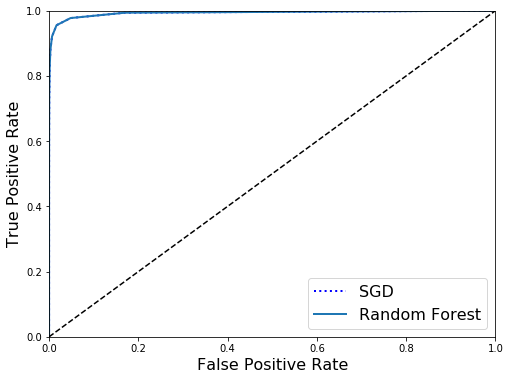

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [0]:
roc_auc_score(y_train_5, y_scores_forest)

0.9929575956414287

In [0]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9848197343453511

In [0]:
recall_score(y_train_5, y_train_pred_forest)

0.8218527315914489

# Multiclass classification

In [0]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [0]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-324388.95157198,  -99887.66296822, -112526.05825708,
        -169991.66672577, -307171.55936022,   77017.77608649,
        -627126.25096493, -394692.66087438, -277561.20359211,
        -616839.88760941]])

In [0]:
np.argmax(some_digit_scores)

5

In [0]:
# Look at number of classes for target variable
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [0]:
sgd_clf.classes_[5]

5

In [0]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [0]:
len(ovo_clf.estimators_)

45

In [0]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [0]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [0]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8624846 , 0.85637756, 0.86306654])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90973375, 0.90726951, 0.90806815])

Adding Random Forest, KNN and Logistic Classifiers

In [0]:
cross_val_score(rnf_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
cross_val_score(Log_Classifier, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90716237, 0.90378743, 0.90388942])

Confusion Matrix for SGD 

In [0]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5339,    2,   26,    9,   12,   35,   36,    9,   32,    2],
       [   1, 6031,   43,   25,    5,   42,    9,   11,  136,   10],
       [  51,   31, 4994,   96,   91,   19,   76,   55,  161,   15],
       [  51,   35,  137, 4987,    2,  222,   33,   55,  123,   92],
       [  17,   25,   43,    8, 5021,   10,   54,   33,   87,  182],
       [  75,   38,   33,  171,   70, 4293,  113,   21,  149,   89],
       [  36,   22,   58,    1,   38,   96, 5162,    6,   40,    0],
       [  26,   24,   69,   25,   46,    9,    4, 5465,   16,  195],
       [  61,  117,   80,  141,   16,  159,   52,   26, 4663,  126],
       [  43,   30,   28,   77,  173,   27,    1,  186,   70, 4913]])

In [0]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

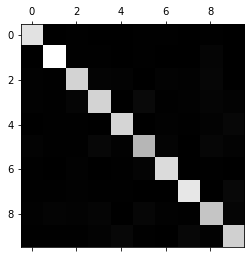

In [0]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

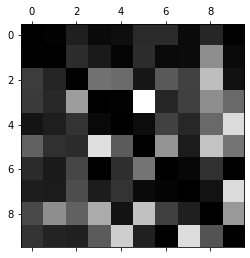

In [0]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Confusion Matrix for Random Forest

In [0]:
y_train_pred_rnf = cross_val_predict(rnf_clf, X_train_scaled, y_train, cv=3)
conf_rnf = confusion_matrix(y_train, y_train_pred_rnf)
conf_rnf

array([[5422,    1,    7,    1,    4,    7,   22,    1,   34,    3],
       [   0, 6213,   34,   15,    8,    5,    9,   15,    8,    6],
       [  23,    8, 5409,   26,   23,    1,   20,   43,   31,    5],
       [   6,    6,   77, 5455,    3,   57,    7,   47,   55,   24],
       [  12,    9,    7,    0, 5314,    1,   28,    6,   13,   90],
       [  19,    4,    9,   53,   10, 4865,   43,    5,   23,   21],
       [  24,   12,    3,    0,   10,   31, 5364,    0,   15,    0],
       [   9,   17,   55,    5,   32,    1,    0, 5685,   10,   65],
       [  11,   28,   26,   41,   26,   33,   23,    6, 5195,   52],
       [  26,   11,   19,   65,   64,   12,    3,   46,   35, 5267]])

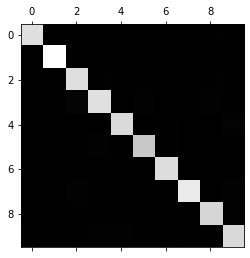

In [0]:
plt.matshow(conf_rnf, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [0]:
row_sums = conf_rnf.sum(axis=1, keepdims=True)
norm_conf_rnf = conf_rnf / row_sums

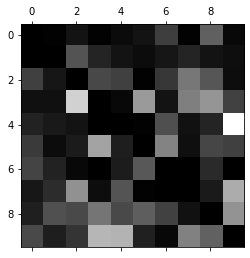

In [0]:
np.fill_diagonal(norm_conf_rnf, 0)
plt.matshow(norm_conf_rnf, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Confusion Matrix for KNN

In [0]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
conf_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_knn

array([[5393,    9,   13,    9,    4,   20,   42,    4,    4,    4],
       [   1, 6249,   19,   10,    6,    2,   13,    4,    3,    6],
       [ 109,  190, 4800,  151,   53,   14,   89,   98,   72,   13],
       [  19,   60,   58, 5292,    7,   82,   11,   93,   66,   49],
       [  11,  130,   43,    9, 4955,   32,   24,   20,    4,  252],
       [  47,   51,   18,  183,   32, 4482,  107,   17,   28,   87],
       [ 118,   35,   31,    2,   26,   61, 5176,    1,    9,    0],
       [  15,  172,   13,   25,   70,    4,    0, 5236,    4,  340],
       [  63,  177,   41,  145,   46,  269,   37,   18, 4538,  107],
       [  34,   43,   26,   71,  143,   13,    1,  269,   14, 4934]])

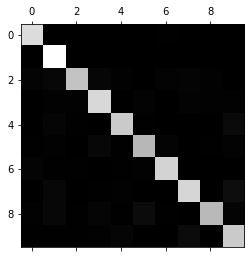

In [0]:
plt.matshow(conf_knn, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [0]:
row_sums = conf_knn.sum(axis=1, keepdims=True)
norm_conf_knn = conf_knn / row_sums

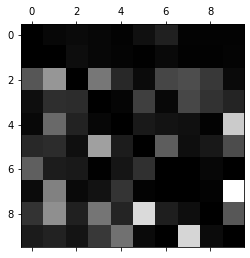

In [0]:
np.fill_diagonal(norm_conf_knn, 0)
plt.matshow(norm_conf_knn, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Confusion Matrix for Logistic Classification

In [0]:
y_train_pred_log = cross_val_predict(Log_Classifier, X_train_scaled, y_train, cv=3)
conf_log = confusion_matrix(y_train, y_train_pred_log)
conf_log

array([[5244,    1,   35,   15,   17,   70,   56,   17,   35,   12],
       [   2, 6097,   54,   26,    9,   31,    7,   17,   60,   10],
       [  46,   86, 4863,  119,   76,   40,   78,   83,  169,   29],
       [  33,   32,  155, 5035,   18,  200,   12,   74,  121,   57],
       [  15,   30,   61,   11, 4987,    9,   64,   53,   45,  205],
       [  52,   26,   50,  172,   55, 4362,   98,   25,  157,   55],
       [  52,   17,   78,    8,   57,   86, 5122,    5,   29,    5],
       [  17,   26,   65,   44,   66,    9,    5, 5415,   21,  211],
       [  48,  120,  107,  164,   36,  189,   51,   22, 4613,   91],
       [  22,   27,   24,   71,  169,   50,    2,  191,   53, 4939]])

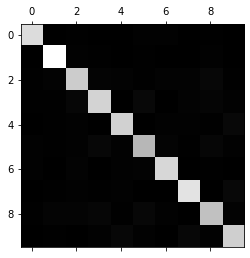

In [0]:
plt.matshow(conf_log, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [0]:
row_sums = conf_log.sum(axis=1, keepdims=True)
norm_conf_log = conf_log / row_sums

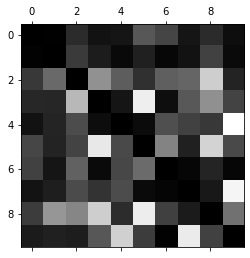

In [0]:
np.fill_diagonal(norm_conf_log, 0)
plt.matshow(norm_conf_log, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()